<a href="https://colab.research.google.com/github/RaimeeShukla/ML_Lab/blob/main/ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 3

NAME: RAIMEE MADHURI SHUKLA

REGISTERATION NUMBER: BL.EN.U4AIE23125

SECTION: AIE-E


Dataset

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded=files.upload()
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)

Saving CatsAndDogs.csv to CatsAndDogs.csv


Question 1

In [ ]:
class_cat=df[df["Animal"]==1].iloc[:,1:]
class_dog=df[df["Animal"]==0].iloc[:,1:]

feature_columns=df.columns[:-1]
label_column=df.columns[-1]

centroids={}
spreads={}

for class_label in df[label_column].unique():
    data=df[df[label_column]==class_label][feature_columns].values
    centroids[class_label]=np.mean(data,axis=0)
    spreads[class_label]=np.std(data,axis=0)

print("\nClass Centroids:")
for label,centroid in centroids.items():
    print(f"{label}: {centroid}")
print("\nClass Spreads:")
for label,spread in spreads.items():
    print(f"{label}: {spread}")

labels=list(centroids.keys())
interclass_distances={}

for i in range(len(labels)):
    for j in range(i+1,len(labels)):
        label1,label2=labels[i],labels[j]
        d=np.linalg.norm(centroids[label1]-centroids[label2])
        interclass_distances[(label1,label2)]=d

print("\nInterclass Distances:")
for (label1,label2),d in interclass_distances.items():
    print(f"Distance between {label1} and {label2}: {d}")


Class Centroids:
0: [29.7   6.1  36.05]
1: [37.58333333 11.58333333 49.45833333]

Class Spreads:
0: [2.95127091 1.75783958 3.32377797]
1: [ 9.27324407  7.71857428 20.44500584]

Interclass Distances:
Distance between 0 and 1: 16.49234039385153


Question 2

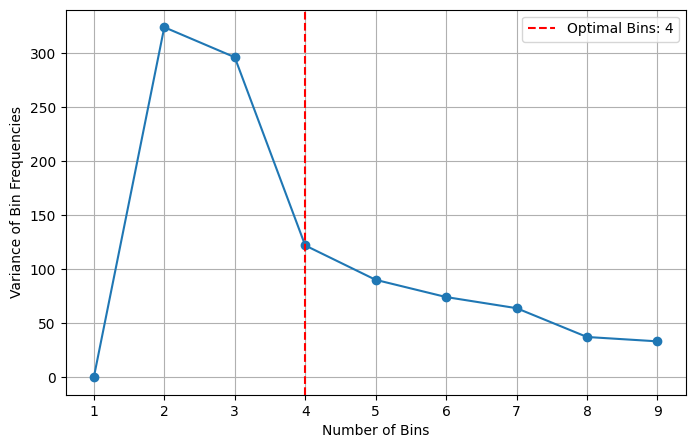

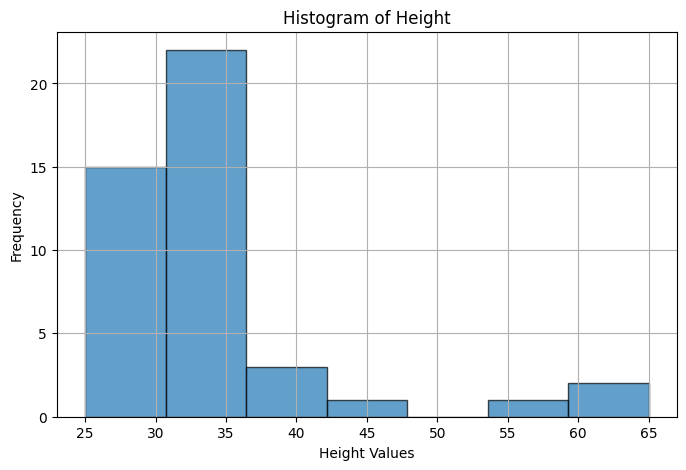


Feature: Height
Mean: 34.0000
Variance: 66.2727


In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import iqr

bin_range=range(1,10,1)
costs=[]

feature=df.columns[0]
feature_data=df[feature].dropna()

for bins in bin_range:
    hist,bin_edges=np.histogram(feature_data,bins=bins)
    bin_width=bin_edges[1]-bin_edges[0]
    variance=np.var(hist)
    costs.append(variance)

plt.figure(figsize=(8,5))
plt.plot(bin_range,costs,marker='o',linestyle='-')
plt.xlabel("Number of Bins")
plt.ylabel("Variance of Bin Frequencies")
plt.grid(True)

best_bins=bin_range[np.argmin(np.gradient(costs))]
plt.axvline(x=best_bins,color='red',linestyle='--',label=f'Optimal Bins: {best_bins}')
plt.legend()
plt.show()

hist,bin_edges=np.histogram(feature_data,bins=4)

plt.figure(figsize=(8,5))
plt.hist(feature_data,bins=7,edgecolor='black',alpha=0.7)
plt.xlabel(f"{feature} Values")
plt.ylabel("Frequency")
plt.title(f"Histogram of {feature}")
plt.grid(True)
plt.show()

mean=np.mean(feature_data)
variance=np.var(feature_data)

print(f"\nFeature: {feature}")
print(f"Mean: {mean:.4f}")
print(f"Variance: {variance:.4f}")

Question 3

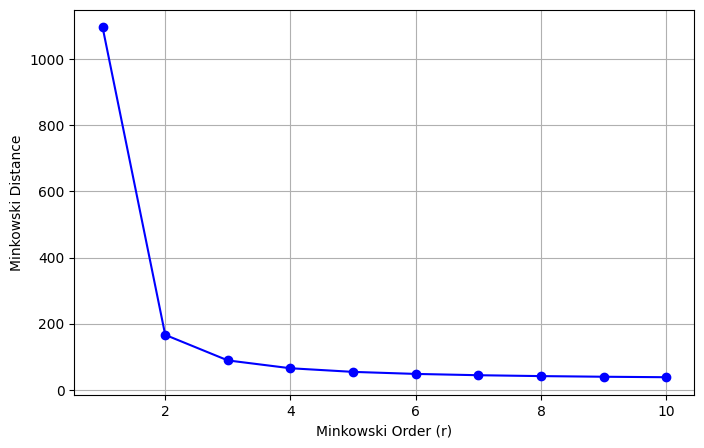

Minkowski Distance for r=1: 1096.0
Minkowski Distance for r=2: 166.33099530754933
Minkowski Distance for r=3: 89.09832167319277
Minkowski Distance for r=4: 65.40756352484318
Minkowski Distance for r=5: 54.45903637836069
Minkowski Distance for r=6: 48.283741679170866
Minkowski Distance for r=7: 44.369060671748244
Minkowski Distance for r=8: 41.69062418392887
Minkowski Distance for r=9: 39.757207718367454
Minkowski Distance for r=10: 38.305264656108434


In [ ]:
from scipy.spatial.distance import minkowski

feature1=df.iloc[:,0].dropna().values
feature2=df.iloc[:,1].dropna().values

min_length=min(len(feature1),len(feature2))
feature1,feature2=feature1[:min_length],feature2[:min_length]

r_values=range(1,11)
distances=[minkowski(feature1,feature2,p=r) for r in r_values]

plt.figure(figsize=(8,5))
plt.plot(r_values,distances,marker='o',linestyle='-',color='b')
plt.xlabel("Minkowski Order (r)")
plt.ylabel("Minkowski Distance")
plt.grid(True)
plt.show()

for r, dist in zip(r_values,distances):
    print(f"Minkowski Distance for r={r}: {dist}")

Question 4

In [ ]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 35 samples
Testing set size: 9 samples


Question 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Question 6

In [ ]:
accuracy=knn.score(X_test,y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.78%


Question 7

In [ ]:
y_pred=knn.predict(X_test)
print(y_pred)

[1 0 0 0 1 1 0 1 0]


Question 8

Accuracy for k=1: 66.67%
Accuracy for k=3: 77.78%


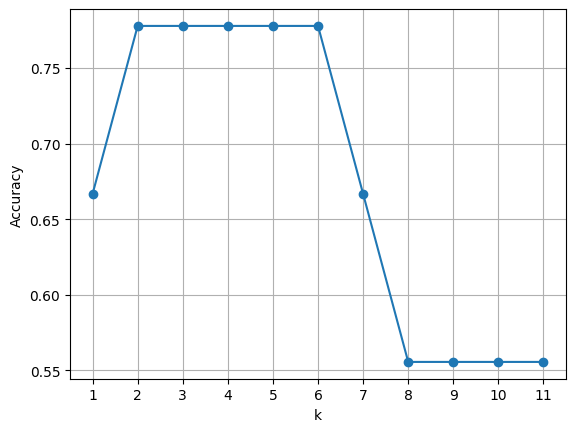

In [ ]:
from sklearn.metrics import accuracy_score
knn1=KNeighborsClassifier(n_neighbors=1)
knn3=KNeighborsClassifier(n_neighbors=3)

knn1.fit(X_train,y_train)
y_pred1=knn1.predict(X_test)
knn3.fit(X_train,y_train)
y_pred3=knn3.predict(X_test)

accuracy1=accuracy_score(y_test,y_pred1)
accuracy3=accuracy_score(y_test,y_pred3)

print(f'Accuracy for k=1: {accuracy1*100:.2f}%')
print(f'Accuracy for k=3: {accuracy3*100:.2f}%')

accuracy=[]
for k in range(1,12):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy.append(acc)

plt.plot(range(1,12),accuracy,marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,12,step=1))
plt.grid(True)
plt.show()

Question 9

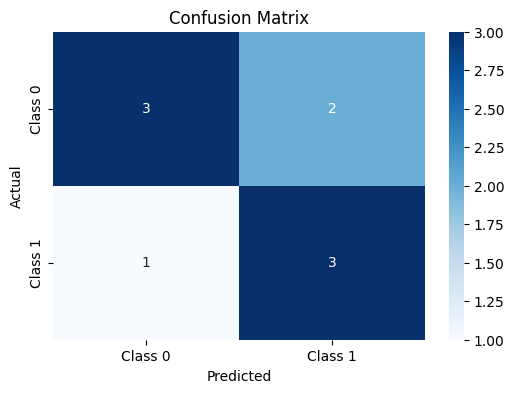

Precision (Training Data): 0.90
Precision (Test Data): 0.60
Recall (Training Data): 0.95
Recall (Test Data): 0.75
F1-Score (Training Data): 0.93
F1-Score (Test Data): 0.67


In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
import seaborn as sns
cm=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

precision_test=precision_score(y_test,y_pred1)
recall_test=recall_score(y_test,y_pred1)
f1_test=f1_score(y_test,y_pred1)

y_train_pred=knn1.predict(X_train)
precision_train=precision_score(y_train,y_train_pred)
recall_train=recall_score(y_train,y_train_pred)
f1_train=f1_score(y_train,y_train_pred)

print(f"Precision (Training Data): {precision_train:.2f}")
print(f"Precision (Test Data): {precision_test:.2f}")
print(f"Recall (Training Data): {recall_train:.2f}")
print(f"Recall (Test Data): {recall_test:.2f}")
print(f"F1-Score (Training Data): {f1_train:.2f}")
print(f"F1-Score (Test Data): {f1_test:.2f}")